# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Breda, North Brabant, Netherlands**, or **Netherlands** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Breda, North Brabant, Netherlands** to Ann Arbor, USA. In that case at least one source file must be about **Breda, North Brabant, Netherlands**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Breda, North Brabant, Netherlands** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Case
For this case, I am going to compare the weather data of ***Breda, North Brabant, Netherlands*** with the weather data of ***Ann Arbor, Michigan, United States***. The dates are between 2005 and 2015. I would like to find out whether recently there is an increase in record maximum temperatures, and a decrease in record minimum temperatures. It is also interesting to note whether this trend occurs both in the Netherlands as in the United States. The dataset that I have used can be found on: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/daggegevens/etmgeg_350.zip. This is actually data on ***Gilze-Rijen, North Brabant, Netherlands***, but this was the closest weather station from Breda. 

### Import the modules

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Enter the downloaded data from Breda into a DataFrame

In [2]:
data = pd.read_csv('etmgeg_350/etmgeg_350.txt', delimiter=',', usecols=['YYYYMMDD', '   TN', '   TX'], parse_dates=['YYYYMMDD'], skipfooter=1, na_values='     ')

C:\Users\niekl\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


### Pre-processing

In [3]:
# Rename the columns
data.rename(columns={'YYYYMMDD': 'Date', '   TN': 'Min', '   TX': 'Max'}, inplace=True)

In [4]:
# Impute missing data using a backward-fill
data.fillna(method='bfill', inplace=True)

In [5]:
# Convert the data (which is in 0.1 degrees Celcius) to degrees Celsius)
data['Min'] = data['Min'].astype(int) / 10
data['Max'] = data['Max'].astype(int) / 10

C:\Users\niekl\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


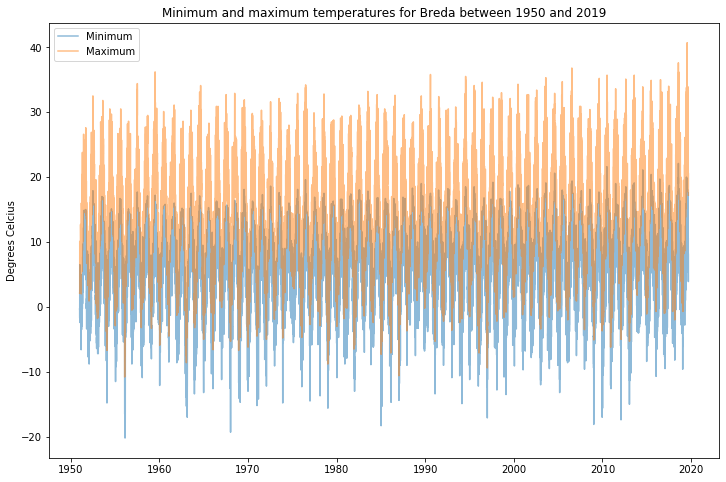

In [6]:
# To explore the dataset, plot the minimum and maximum temperatures between 1950 and 2019
plt.figure(figsize=(12,8))
plt.plot(data['Date'], data['Min'], data['Date'], data['Max'], alpha=0.5)
plt.title('Minimum and maximum temperatures for Breda between 1950 and 2019')
plt.ylabel('Degrees Celcius')
plt.legend(['Minimum', 'Maximum']);

In [7]:
# We only need the data between 2005 and 2015, discard the rest
data = data[(data['Date'] >= '20050101') & (data['Date'] < '20160101')]

In [8]:
# Get a 'day' and 'month' column from 'Date'
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month

In [9]:
# Get the maximum and minimum temperatures for each day of the year
record_high = data.loc[data.groupby(['Month', 'Day'])['Max'].idxmax()]
record_low = data.loc[data.groupby(['Month', 'Day'])['Min'].idxmin()]

In [10]:
# Generate a list of possible dates
dates = pd.date_range(pd.datetime(2016, 1, 1), periods=366).tolist()

In [11]:
# Get the dates where the maximum and mimimum temperature records were broken in 2015
record_high_2015 = record_high[record_high['Date'] >= '20150101']
record_low_2015 = record_low[record_low['Date'] >= '20150101']

In [12]:
# Add a year to the DataFrame, so the dates are in 2016 (which include leap years)
record_high_2015['Date'] = record_high_2015['Date'].apply(lambda dt: dt.replace(year=2016))
record_low_2015['Date'] = record_low_2015['Date'].apply(lambda dt: dt.replace(year=2016))

C:\Users\niekl\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\niekl\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Plot the data

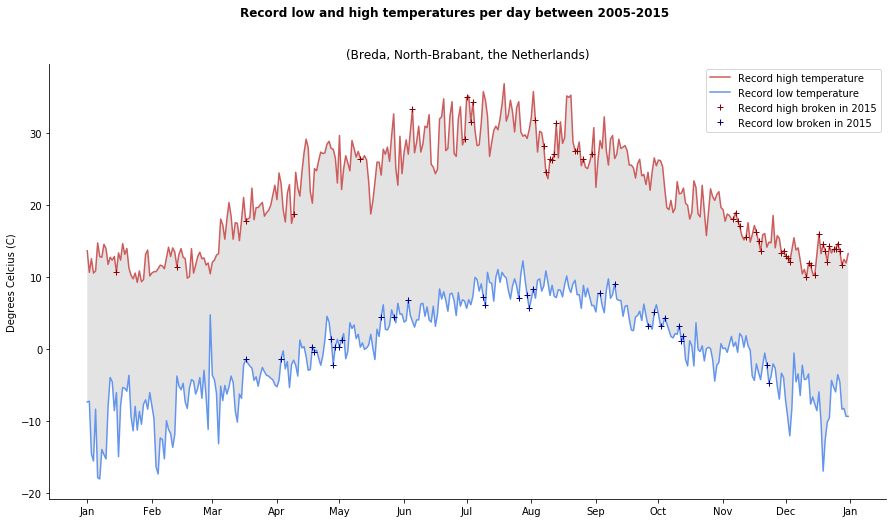

In [13]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 8))

# Plot the record high and low temperatures for all days in the year
plt.plot(dates, record_high['Max'], 'indianred',
         dates, record_low['Min'], 'cornflowerblue')

# Fill the area between the record highs and record lows
plt.fill_between(dates, record_high['Max'], record_low['Min'], alpha=0.8, facecolor='gainsboro')

# Overlay a scatter plot for the dates where the record was broken in 2015
plt.plot_date(record_high_2015['Date'], record_high_2015['Max'], c='darkred', marker='+')
plt.plot_date(record_low_2015['Date'], record_low_2015['Min'], c='darkblue', marker='+')

# Re-format the dates on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Remove the spines at the top and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Add a title and y-label
plt.suptitle('Record low and high temperatures per day between 2005-2015', fontweight=1000)
plt.title('(Breda, North-Brabant, the Netherlands)')
plt.ylabel('Degrees Celcius (C)')

# Add a legend
plt.legend(['Record high temperature',
            'Record low temperature',
            'Record high broken in 2015',
            'Record low broken in 2015']);

### Get the data from Ann Arbor (Assignment 2)

![](weather_ann_arbor.png)

In [14]:
# Calculate the percentages of records broken in 2015 
breda_max = record_high_2015['Max'].count() / record_high['Max'].count() * 100
breda_min = record_low_2015['Min'].count() / record_low['Min'].count() * 100

In [15]:
# These percentages are taken from assignment 2
ann_max = 10.10928961748634
ann_min = 8.7431693989071047

### Plot the percentages

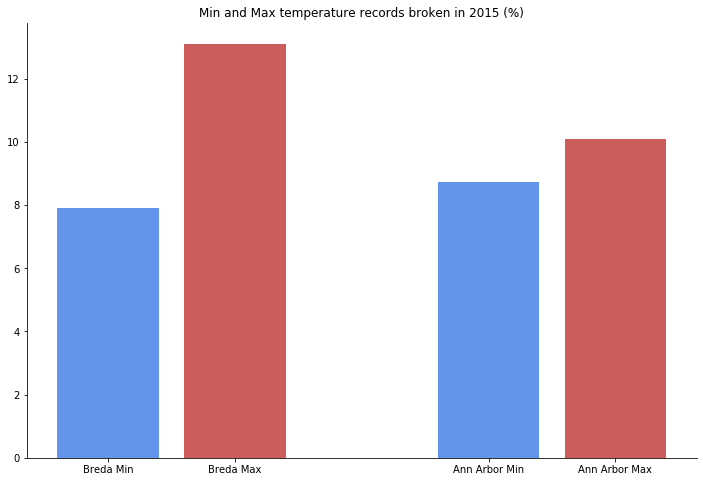

In [16]:
plt.figure(figsize=(12,8))

# Add spacing between the bars
y_pos = [0,1,3,4]

# Generate a bar plot from the data
plt.bar(x=y_pos, tick_label=['Breda Min', 'Breda Max', 'Ann Arbor Min', 'Ann Arbor Max'], height=[breda_min, breda_max, ann_min, ann_max],
        color=['cornflowerblue', 'indianred', 'cornflowerblue', 'indianred'])

# Remove the spines at the top and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Add a title
plt.title('Min and Max temperature records broken in 2015 (%)');

## Conclusion
There definitely seems to exist an upward trend in extreme high temperatures, while extreme high temperatures are occurring less often. However, this trend seems to be more pronounced in ***Breda*** compared to ***Ann Arbor***. It might be interesting to investigate this further, although it is outside the scope of this case study.